# Notebook 7.1 - Routing Optimization

Management Science - Bean Counter’s Delivery Excellence

# Introduction

Welcome back, CEO! Bean Counter has grown to up to **10 franchise
locations** across some cities, and you personally want to optimize the
weekly coffee bean deliveries in all cities. Currently, delivery trucks
just follow a random route. Time to optimize!

**The Delivery Challenge:**

-   One truck leaves from Bean Counter HQ in a city
-   Must deliver coffee beans to all 10 franchises
-   Each franchise needs their specific blend
-   Fuel costs €1.50 per km
-   Driver costs €30 per hour

Your board calculated that poor routing costs Bean Counter **€2,500
monthly** in excess fuel and labor. Let’s fix this!

> **How to Use This Tutorial**
>
> Work through each section in order. Write code where marked “YOUR CODE
> BELOW” and verify with the provided assertions. This prepares you for
> the competition challenge!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import math

# Set random seed for reproducibility
np.random.seed(42)
print("Libraries loaded! Let's optimize Bean Counter's deliveries.")

Libraries loaded! Let's optimize Bean Counter's deliveries.

# Section 1 - Understanding the Delivery Network

Before optimizing routes, we need to understand distances and the scale
of the problem.

## Bean Counter’s Franchise Locations

In [2]:
# Set random seed for reproducibility
np.random.seed(2025)

# Generate franchise locations (x, y coordinates in km)
n_franchises = 10

# Bean Counter HQ at city center
hq_location = (5, 5)

# Generate 10 franchise locations randomly in a 10x10 km area
franchise_locations = []
for i in range(n_franchises):
    x = np.random.uniform(0.5, 9.5)
    y = np.random.uniform(0.5, 9.5)
    franchise_locations.append((x, y))

franchise_names = [
    "North District", "Northeast Corner", "East Side", "Southeast",
    "South Quarter", "Southwest", "West End", "North Central",
    "City Center East", "Inner West"
]

print(f"Bean Counter HQ: {hq_location}")
print(f"Number of franchises: {len(franchise_locations)}")
print(f"Total possible routes: {math.factorial(n_franchises):,}")

Bean Counter HQ: (5, 5)
Number of franchises: 10
Total possible routes: 3,628,800

## Exercise 1.1 - Calculate Distance Between Two Points

First, let’s implement the distance calculation using the Euclidean
distance formula.

> **The Euclidean Distance Formula**
>
> The Euclidean distance between points $(x_1, y_1)$ and $(x_2, y_2)$
> is: $$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$
>
> **Example:** Distance from (0, 0) to (3, 4)
> $$d = \sqrt{(3-0)^2 + (4-0)^2} = \sqrt{9 + 16} = \sqrt{25} = 5$$

> **Working with Tuples**
>
> A **tuple** is a collection of values in parentheses: `point = (x, y)`
>
> ``` python
> # Unpacking tuple values
> point1 = (5, 5)
> x1, y1 = point1  # x1 = 5, y1 = 5
>
> # Or access by index
> x1 = point1[0]   # First element
> y1 = point1[1]   # Second element
> ```

In [3]:
# YOUR CODE BELOW
def calculate_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.

    Args:
        point1: Tuple (x, y) for first location
        point2: Tuple (x, y) for second location

    Returns:
        Distance in km
    """
    # Step 1: Extract x and y coordinates from both points
    
    # Step 2: Calculate differences and apply distance formula
    
    pass  # Remove this and implement

In [4]:
# SOLUTION
def calculate_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.

    Args:
        point1: Tuple (x, y) for first location
        point2: Tuple (x, y) for second location

    Returns:
        Distance in km
    """
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [5]:
# Don't modify below - these test your solution
# Test 1: Known distance (3-4-5 triangle)
test_dist = calculate_distance((0, 0), (3, 4))
assert abs(test_dist - 5.0) < 0.001, f"Distance should be 5.0, got {test_dist}"

# Test 2: Distance to same point should be zero
same_point = calculate_distance(hq_location, hq_location)
assert abs(same_point) < 0.001, f"Distance to same point should be 0, got {same_point}"

# Test 3: Distance should be positive for different points
hq_to_first = calculate_distance(hq_location, franchise_locations[0])
assert hq_to_first > 0, f"Distance should be positive, got {hq_to_first:.2f}"

# Test 4: Distance should be symmetric
dist_a_to_b = calculate_distance(hq_location, franchise_locations[0])
dist_b_to_a = calculate_distance(franchise_locations[0], hq_location)
assert abs(dist_a_to_b - dist_b_to_a) < 0.001, "Distance should be symmetric"

print("✓ Distance calculation correct!")
print(f"HQ to first franchise: {hq_to_first:.2f} km")

## Exercise 1.2 - Create Distance Matrix

Now create a matrix of all distances between locations (HQ and
franchises).

> **What is a Distance Matrix?**
>
> A **distance matrix** stores all pairwise distances in a 2D array:
>
> |     | HQ  | F1  | F2  | F3  |
> |-----|-----|-----|-----|-----|
> | HQ  | 0   | 3.2 | 5.1 | 4.0 |
> | F1  | 3.2 | 0   | 2.8 | 6.1 |
> | F2  | 5.1 | 2.8 | 0   | 3.9 |
> | F3  | 4.0 | 6.1 | 3.9 | 0   |
>
> `distances[0][1]` = distance from HQ to Franchise 1 = 3.2 km

> **Nested Loops for Matrices**
>
> Use **nested for loops** to fill a 2D array:
>
> ``` python
> # Create 3x3 matrix
> matrix = np.zeros((3, 3))
>
> # Fill it with nested loops
> for i in range(3):      # Rows
>     for j in range(3):  # Columns
>         matrix[i][j] = i + j
>
> # Result: [[0, 1, 2],
> #          [1, 2, 3],
> #          [2, 3, 4]]
> ```

In [6]:
# YOUR CODE BELOW
def create_distance_matrix(hq_location, franchise_locations):
    """
    Create a distance matrix for all locations.

    Args:
        hq_location: Tuple (x, y) for HQ
        franchise_locations: List of tuples for franchises

    Returns:
        2D numpy array where element [i][j] is distance from location i to j
        Index 0 is HQ, indices 1-10 are franchises
    """
    all_locations = [hq_location] + franchise_locations
    n = len(all_locations)

    # Create empty matrix
    distances = np.zeros((n, n))

    # Fill the matrix using nested loops
    # Hint: Use your calculate_distance function!
    # Remember: distance from i to i should be 0
    # YOUR CODE HERE

    return distances

In [7]:
# SOLUTION
def create_distance_matrix(hq_location, franchise_locations):
    """
    Create a distance matrix for all locations.

    Args:
        hq_location: Tuple (x, y) for HQ
        franchise_locations: List of tuples for franchises

    Returns:
        2D numpy array where element [i][j] is distance from location i to j
        Index 0 is HQ, indices 1-10 are franchises
    """
    all_locations = [hq_location] + franchise_locations
    n = len(all_locations)

    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i != j:
                distances[i][j] = calculate_distance(all_locations[i], all_locations[j])

    return distances

# Create the distance matrix
distance_matrix = create_distance_matrix(hq_location, franchise_locations)

In [8]:
# Don't modify below - these test your solution
assert distance_matrix.shape == (11, 11), "Matrix should be 11x11 (HQ + 10 franchises)"
assert np.all(np.diag(distance_matrix) == 0), "Diagonal should be zeros (distance to self)"
assert np.allclose(distance_matrix, distance_matrix.T), "Matrix should be symmetric"
assert distance_matrix[0, 1] > 3.5, "HQ to first franchise distance check"

print("✓ Distance matrix created successfully!")
print(f"Average distance between locations: {np.mean(distance_matrix[distance_matrix > 0]):.2f} km")

# Section 2 - Greedy Construction: Nearest Neighbor

Now let’s build our first route using the nearest neighbor algorithm.

## Understanding Nearest Neighbor

The algorithm is simple but effective:

1.  Start at HQ
2.  Find the nearest unvisited franchise
3.  Go there and deliver
4.  Repeat until all visited
5.  Return to HQ

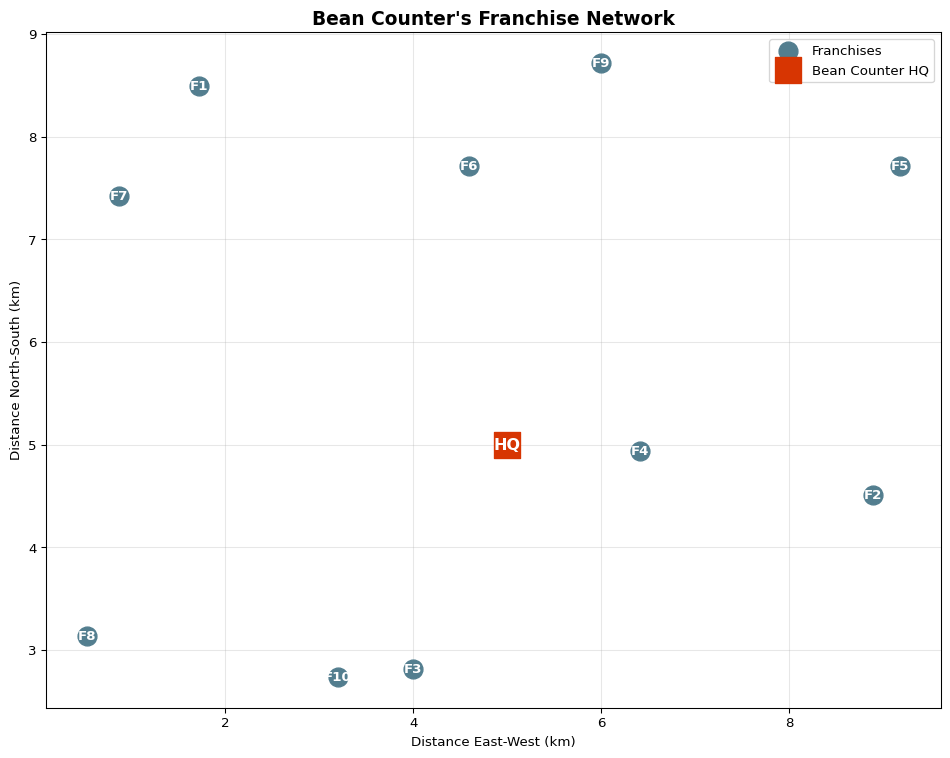

In [9]:
# Visualize Bean Counter's delivery network
plt.figure(figsize=(10, 8))

# Plot franchises
x_coords = [loc[0] for loc in franchise_locations]
y_coords = [loc[1] for loc in franchise_locations]
plt.scatter(x_coords, y_coords, c='#537E8F', s=200, label='Franchises', zorder=3)

# Plot HQ
plt.scatter(hq_location[0], hq_location[1], c='#D73502', s=400,
           marker='s', label='Bean Counter HQ', zorder=3)

# Add labels
for i, (x, y) in enumerate(franchise_locations):
    plt.annotate(f'F{i+1}', (x, y), ha='center', va='center',
                color='white', fontweight='bold')
plt.annotate('HQ', hq_location, ha='center', va='center',
            color='white', fontweight='bold', fontsize=12)

plt.xlabel('Distance East-West (km)')
plt.ylabel('Distance North-South (km)')
plt.title("Bean Counter's Franchise Network", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Exercise 2.1 - Implement Nearest Neighbor

Build a route using the nearest neighbor heuristic.

> **The min() Function with key Parameter**
>
> Find the minimum based on a custom criterion:
>
> ``` python
> # Find smallest number
> numbers = [5, 2, 8, 1]
> smallest = min(numbers)  # 1
>
> # Find shortest word
> words = ["hello", "hi", "hey"]
> shortest = min(words, key=len)  # "hi"
>
> # Find franchise with minimum distance
> unvisited = [1, 2, 3]
> distances_from_hq = [5.2, 3.1, 7.8]
> nearest = min(unvisited, key=lambda i: distances_from_hq[i-1])  # 2
> ```
>
> The `key=lambda i: ...` tells Python how to compare items.

> **List Operations You’ll Need**
>
> ``` python
> # Add to list
> route.append(5)         # route = [1, 2, 3, 5]
>
> # Remove from list
> unvisited.remove(5)     # Removes value 5
>
> # Check if list is empty
> while unvisited:        # Loops while list has items
>     # do something
> ```

In [10]:
# YOUR CODE BELOW
def nearest_neighbor_route(distance_matrix):
    """
    Build a delivery route using nearest neighbor algorithm.

    Args:
        distance_matrix: 2D array of distances (index 0 is HQ)

    Returns:
        List of franchise indices in visit order (not including HQ)
    """
    n_locations = len(distance_matrix)
    unvisited = list(range(1, n_locations))  # Franchise indices (skip 0 which is HQ)
    route = []
    current = 0  # Start at HQ

    while unvisited:
        # Step 1: Find nearest unvisited franchise using min()
        # Hint: key=lambda i: distance_matrix[current, i]
        
        # Step 2: Add it to the route
        
        # Step 3: Remove from unvisited
        
        # Step 4: Update current location
        
        pass  # Remove this

    return route

In [11]:
# SOLUTION
def nearest_neighbor_route(distance_matrix):
    """
    Build a delivery route using nearest neighbor algorithm.

    Args:
        distance_matrix: 2D array of distances (index 0 is HQ)

    Returns:
        List of franchise indices in visit order (not including HQ)
    """
    n_locations = len(distance_matrix)
    unvisited = list(range(1, n_locations))  # Franchise indices
    route = []
    current = 0  # Start at HQ

    while unvisited:
        # Find nearest unvisited franchise from current location
        nearest_idx = min(unvisited,
                         key=lambda x: distance_matrix[current, x])
        route.append(nearest_idx)
        unvisited.remove(nearest_idx)
        current = nearest_idx

    return route

# Build the initial route
initial_route = nearest_neighbor_route(distance_matrix)

In [12]:
# Don't modify below - these test your solution
assert len(initial_route) == 10, "Route should visit all 10 franchises"
assert len(set(initial_route)) == 10, "Each franchise should be visited exactly once"
assert all(1 <= f <= 10 for f in initial_route), "Route should contain franchise indices 1-10"
print("✓ Nearest neighbor route constructed!")
print(f"Visit order: {initial_route}")

## Exercise 2.2 - Calculate Total Route Distance

Calculate the total distance for a complete delivery route (HQ →
Franchises → HQ).

In [13]:
# YOUR CODE BELOW
def calculate_route_distance(route, distance_matrix):
    """
    Calculate total distance for a delivery route.

    Args:
        route: List of franchise indices in visit order
        distance_matrix: 2D array of distances

    Returns:
        Total distance in km
    """
    total_distance = 0

    # Add distance from HQ to first franchise
    # YOUR CODE HERE

    # Add distances between consecutive franchises
    # YOUR CODE HERE

    # Add distance from last franchise back to HQ
    # YOUR CODE HERE

    return total_distance

In [14]:
# SOLUTION
def calculate_route_distance(route, distance_matrix):
    """
    Calculate total distance for a delivery route.

    Args:
        route: List of franchise indices in visit order
        distance_matrix: 2D array of distances

    Returns:
        Total distance in km
    """
    total_distance = 0

    # HQ to first franchise
    total_distance += distance_matrix[0, route[0]]

    # Between consecutive franchises
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i+1]]

    # Last franchise back to HQ
    total_distance += distance_matrix[route[-1], 0]

    return total_distance

# Calculate initial route distance
initial_distance = calculate_route_distance(initial_route, distance_matrix)

In [15]:
# Don't modify below - these test your solution
# Test 1: Partial route should have positive distance
test_route = [1, 2, 3]
test_dist = calculate_route_distance(test_route, distance_matrix)
assert test_dist > 0, "Distance should be positive"

# Test 2: Full route distance should be reasonable (not too small, not too large)
full_dist = calculate_route_distance(initial_route, distance_matrix)
assert full_dist > 10, f"Total distance too small, check if return trip included: {full_dist:.2f} km"
assert full_dist < 150, f"Total distance too large, check calculation: {full_dist:.2f} km"

# Test 3: Full route should be longer than partial route
assert full_dist > test_dist, "Full route should be longer than partial route"

print(f"✓ Route distance calculation correct!")
print(f"Nearest neighbor route: {full_dist:.2f} km")
print(f"Fuel cost: €{full_dist * 1.5:.2f}")
print(f"Time estimate: {full_dist / 30:.1f} hours at 30 km/h average")

# Section 3 - Local Search: 2-Opt Improvement

The nearest neighbor route works, but can we improve it? Enter 2-opt!

## Understanding 2-Opt Swaps

2-opt looks for crossing paths in the route and uncrosses them:

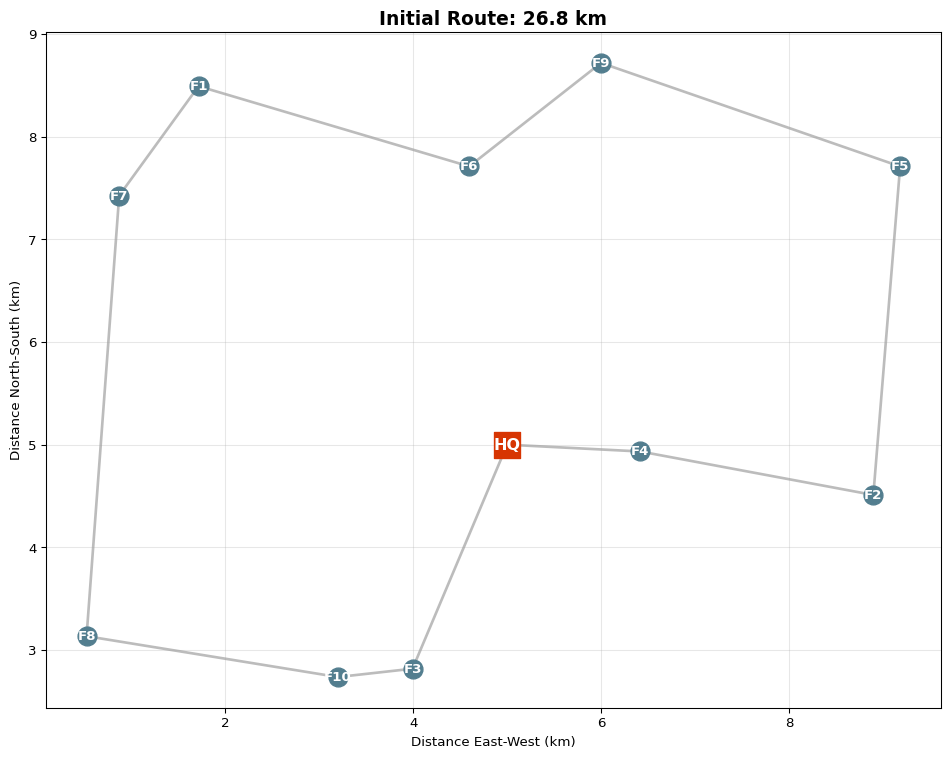

In [16]:
# Visualize the initial nearest neighbor route
plt.figure(figsize=(10, 8))

# Create route coordinates for plotting
route_coords = [hq_location]
for idx in initial_route:
    route_coords.append(franchise_locations[idx - 1])
route_coords.append(hq_location)

# Plot route
route_x = [coord[0] for coord in route_coords]
route_y = [coord[1] for coord in route_coords]
plt.plot(route_x, route_y, 'o-', color='#A0A0A0', linewidth=2,
         markersize=0, alpha=0.7, label='Delivery Route')

# Plot locations
plt.scatter(x_coords, y_coords, c='#537E8F', s=200, zorder=3)
plt.scatter(hq_location[0], hq_location[1], c='#D73502', s=400,
           marker='s', zorder=3)

# Add labels
for i, (x, y) in enumerate(franchise_locations):
    plt.annotate(f'F{i+1}', (x, y), ha='center', va='center',
                color='white', fontweight='bold')
plt.annotate('HQ', hq_location, ha='center', va='center',
            color='white', fontweight='bold', fontsize=12)

plt.xlabel('Distance East-West (km)')
plt.ylabel('Distance North-South (km)')
plt.title(f'Initial Route: {initial_distance:.1f} km', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Exercise 3.1 - Implement 2-Opt Swap

Implement the logic to perform a 2-opt swap on a route.

> **What Does 2-Opt Do?**
>
> A **2-opt swap** reverses a segment of the route to eliminate
> crossings:
>
> -   **Before:** Route = \[1, 2, 3, 4, 5, 6\]  
> -   **Swap(1, 4):** Reverse segment from position 2 to 4  
> -   **After:** Route = \[1, 2, **5, 4, 3**, 6\]
>
> This uncrosses paths and usually reduces total distance!

> **List Slicing and Reversal**
>
> ``` python
> route = [1, 2, 3, 4, 5, 6]
>
> # Slice: get part of list
> route[:3]        # [1, 2, 3] - start to index 3
> route[3:]        # [4, 5, 6] - index 3 to end
> route[2:5]       # [3, 4, 5] - index 2 to 5
>
> # Reverse: [::-1]
> route[2:5][::-1] # [5, 4, 3] - reversed segment
>
> # Combine slices
> route[:2] + route[2:5][::-1] + route[5:]
> # [1, 2] + [5, 4, 3] + [6] = [1, 2, 5, 4, 3, 6]
> ```

In [17]:
# YOUR CODE BELOW
def perform_2opt_swap(route, i, j):
    """
    Perform a 2-opt swap on a route.

    Args:
        route: Current route (list of indices)
        i: First position for swap
        j: Second position for swap (j > i)

    Returns:
        New route with the swap applied
    """
    # Create new route: beginning + reversed_middle + end
    # route[:i+1] keeps elements from start to i (inclusive)
    # route[i+1:j+1][::-1] reverses segment from i+1 to j
    # route[j+1:] keeps elements after j
    
    # YOUR CODE HERE (combine the three parts)

    pass  # Remove this

In [18]:
# SOLUTION
def perform_2opt_swap(route, i, j):
    """
    Perform a 2-opt swap on a route.

    Args:
        route: Current route (list of indices)
        i: First position for swap
        j: Second position for swap (j > i)

    Returns:
        New route with the swap applied
    """
    # Take route from start to i, reverse segment from i+1 to j, then rest
    new_route = route[:i+1] + route[i+1:j+1][::-1] + route[j+1:]
    return new_route

In [19]:
# Don't modify below - these test your solution
test_route = [1, 2, 3, 4, 5]
swapped = perform_2opt_swap(test_route, 1, 3)
assert swapped == [1, 2, 4, 3, 5], f"Expected [1, 2, 4, 3, 5], got {swapped}"

test2 = perform_2opt_swap([1, 2, 3, 4, 5, 6], 0, 4)
assert test2 == [1, 5, 4, 3, 2, 6], f"Expected [1, 5, 4, 3, 2, 6], got {test2}"

print("✓ 2-opt swap implemented correctly!")

## Exercise 3.2 - Complete 2-Opt Algorithm

Now implement the full 2-opt improvement algorithm.

> **The 2-Opt Algorithm Logic**
>
> 1.  Keep trying swaps until no improvement found
> 2.  For each pair of positions (i, j):
>     -   Create new route with that swap
>     -   Calculate its distance
>     -   If better, keep it and mark `improved = True`
> 3.  Stop when a full pass finds no improvements

> **Breaking Out of Nested Loops**
>
> When you find an improvement, you want to restart the search:
>
> ``` python
> for i in range(10):
>     for j in range(10):
>         if found_improvement:
>             improved = True
>             break  # Exits inner loop
>     if improved:
>         break  # Exits outer loop
> # Now restart the whole search
> ```

In [20]:
# YOUR CODE BELOW
def improve_route_2opt(route, distance_matrix, max_iterations=100):
    """
    Improve a route using 2-opt local search.

    Args:
        route: Initial route
        distance_matrix: Distance matrix
        max_iterations: Maximum improvement iterations

    Returns:
        Tuple of (improved_route, final_distance, improvement_count)
    """
    current_route = route.copy()
    current_distance = calculate_route_distance(current_route, distance_matrix)
    improvement_count = 0

    for iteration in range(max_iterations):
        improved = False

        # Try all possible 2-opt swaps
        for i in range(len(current_route) - 1):
            for j in range(i + 2, len(current_route)):
                # Step 1: Create new route with swap
                
                # Step 2: Calculate distance of new route
                
                # Step 3: If better, keep it and mark improved
                # Remember to update: current_route, current_distance, improvement_count
                
                # Step 4: Break to restart search
                
                pass  # Remove this
                
            if improved:
                break

        if not improved:
            break  # No more improvements found

    return current_route, current_distance, improvement_count

In [21]:
# SOLUTION
def improve_route_2opt(route, distance_matrix, max_iterations=100):
    """
    Improve a route using 2-opt local search.

    Args:
        route: Initial route
        distance_matrix: Distance matrix
        max_iterations: Maximum improvement iterations

    Returns:
        Tuple of (improved_route, final_distance, improvement_count)
    """
    current_route = route.copy()
    current_distance = calculate_route_distance(current_route, distance_matrix)
    improvement_count = 0

    for iteration in range(max_iterations):
        improved = False

        for i in range(len(current_route) - 1):
            for j in range(i + 2, len(current_route)):
                # Try the swap
                new_route = perform_2opt_swap(current_route, i, j)
                new_distance = calculate_route_distance(new_route, distance_matrix)

                # Keep if better
                if new_distance < current_distance:
                    current_route = new_route
                    current_distance = new_distance
                    improvement_count += 1
                    improved = True
                    break

            if improved:
                break

        if not improved:
            break  # Local optimum reached

    return current_route, current_distance, improvement_count

# Improve the route
improved_route, improved_distance, improvements = improve_route_2opt(
    initial_route, distance_matrix
)

In [22]:
# Don't modify below - these test your solution
assert len(improved_route) == 10, "Improved route should still visit all franchises"
assert improved_distance <= initial_distance, "Distance shouldn't increase"
assert improvements >= 0, "Should track improvements"

improvement_pct = (initial_distance - improved_distance) / initial_distance * 100
print(f"✓ 2-opt improvement complete!")
print(f"Initial distance: {initial_distance:.2f} km")
print(f"Improved distance: {improved_distance:.2f} km")
print(f"Improvement: {improvement_pct:.1f}% ({improvements} swaps)")
print(f"Monthly savings: €{(initial_distance - improved_distance) * 1.5 * 20:.2f}")

# Section 4 - Comparing Different Initial Solutions

Different starting points can lead to different final solutions. Let’s
explore!

## Exercise 4.1 - Random Initial Route

Create a random initial route and see if 2-opt can improve it.

In [23]:
# YOUR CODE BELOW
def create_random_route(n_franchises):
    """
    Create a random delivery route.

    Args:
        n_franchises: Number of franchises

    Returns:
        Random route (list of indices 1 to n_franchises)
    """
    # Create list [1, 2, ..., n_franchises] and shuffle it
    # YOUR CODE HERE

    pass  # Remove this

# Create and improve random route
random_route = create_random_route(10)
random_distance = calculate_route_distance(random_route, distance_matrix)

# Improve it with 2-opt
random_improved, random_final_dist, random_swaps = improve_route_2opt(
    random_route, distance_matrix
)

In [24]:
# SOLUTION
def create_random_route(n_franchises):
    """
    Create a random delivery route.

    Args:
        n_franchises: Number of franchises

    Returns:
        Random route (list of indices 1 to n_franchises)
    """
    route = list(range(1, n_franchises + 1))
    np.random.shuffle(route)
    return route

# Create and improve random route
np.random.seed(123)  # For reproducibility
random_route = create_random_route(10)
random_distance = calculate_route_distance(random_route, distance_matrix)

# Improve it with 2-opt
random_improved, random_final_dist, random_swaps = improve_route_2opt(
    random_route, distance_matrix
)

In [25]:
# Don't modify below - these test your solution
assert len(random_route) == 10, "Random route should have 10 franchises"
assert set(random_route) == set(range(1, 11)), "Should contain franchises 1-10"
assert random_final_dist <= random_distance, "2-opt shouldn't make it worse"

print(f"✓ Random route analysis complete!")
print(f"Random initial: {random_distance:.2f} km")
print(f"After 2-opt: {random_final_dist:.2f} km")
print(f"Improvements: {random_swaps} swaps")

## Exercise 4.2 - Multiple Random Starts

Try multiple random starting points to find the best solution.

In [26]:
# YOUR CODE BELOW
def multi_start_optimization(distance_matrix, n_starts=10):
    """
    Run 2-opt from multiple random starting points.

    Args:
        distance_matrix: Distance matrix
        n_starts: Number of random starts to try

    Returns:
        Best route found and its distance
    """
    best_route = None
    best_distance = float('inf')

    for i in range(n_starts):
        # Create random initial route
        # YOUR CODE HERE

        # Improve with 2-opt
        # YOUR CODE HERE

        # Keep if best so far
        # YOUR CODE HERE

        pass  # Remove this

    return best_route, best_distance

# Try multi-start optimization
multi_route, multi_distance = multi_start_optimization(distance_matrix, n_starts=20)

In [27]:
# SOLUTION
def multi_start_optimization(distance_matrix, n_starts=10):
    """
    Run 2-opt from multiple random starting points.

    Args:
        distance_matrix: Distance matrix
        n_starts: Number of random starts to try

    Returns:
        Best route found and its distance
    """
    best_route = None
    best_distance = float('inf')

    for i in range(n_starts):
        # Random start
        initial = create_random_route(10)

        # Improve
        improved, distance, _ = improve_route_2opt(initial, distance_matrix)

        # Keep if best
        if distance < best_distance:
            best_route = improved
            best_distance = distance

    return best_route, best_distance

# Try multi-start optimization
np.random.seed(42)
multi_route, multi_distance = multi_start_optimization(distance_matrix, n_starts=20)

In [28]:
# Don't modify below - these test your solution
assert len(multi_route) == 10, "Best route should have 10 franchises"
assert multi_distance <= improved_distance, "Multi-start shouldn't be worse than single"

print(f"✓ Multi-start optimization complete!")
print(f"Best distance found: {multi_distance:.2f} km")
print(f"vs. Nearest Neighbor + 2-opt: {improved_distance:.2f} km")
print(f"vs. Random + 2-opt: {random_final_dist:.2f} km")

# Section 5 - Making the CEO Decision

As CEO, you need to choose the best approach for Bean Counter’s
deliveries.

## Visualizing All Solutions

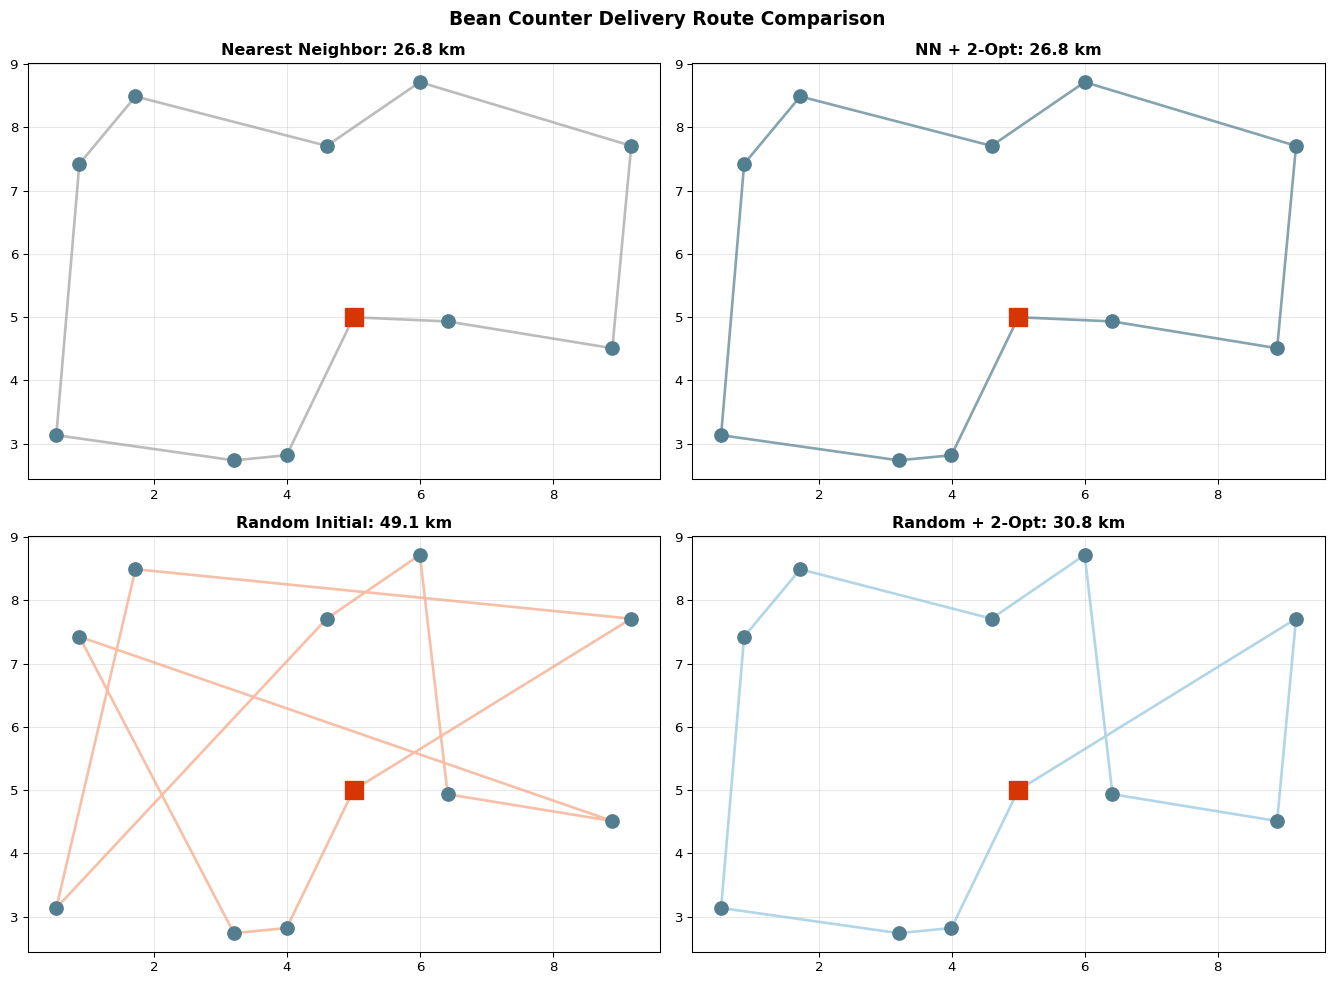

In [29]:
# Compare all approaches
plt.figure(figsize=(14, 10))

# Define all routes and methods for comparison
routes = [
    (initial_route, initial_distance, "Nearest Neighbor", '#A0A0A0'),
    (improved_route, improved_distance, "NN + 2-Opt", '#537E8F'),
    (random_route, random_distance, "Random Initial", '#F4A582'),
    (random_improved, random_final_dist, "Random + 2-Opt", '#92C5DE'),
    (multi_route, multi_distance, "Multi-Start Best", '#D73502')
]

# Create subplots
for idx, (route, distance, title, color) in enumerate(routes[:4], 1):
    plt.subplot(2, 2, idx)

    # Create route coordinates
    route_coords = [hq_location]
    for r_idx in route:
        route_coords.append(franchise_locations[r_idx - 1])
    route_coords.append(hq_location)

    # Plot route
    route_x = [coord[0] for coord in route_coords]
    route_y = [coord[1] for coord in route_coords]
    plt.plot(route_x, route_y, 'o-', color=color, linewidth=2,
             markersize=0, alpha=0.7)

    # Plot locations
    plt.scatter(x_coords, y_coords, c='#537E8F', s=100, zorder=3)
    plt.scatter(hq_location[0], hq_location[1], c='#D73502',
               s=200, marker='s', zorder=3)

    plt.title(f'{title}: {distance:.1f} km', fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Bean Counter Delivery Route Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## Exercise 5.1 - Performance Summary

Create a summary comparing all approaches.

In [30]:
# YOUR CODE BELOW
def create_performance_summary(methods_data):
    """
    Create a performance summary DataFrame.

    Args:
        methods_data: List of tuples (method_name, distance, time_hours)

    Returns:
        DataFrame with performance metrics
    """
    # Create DataFrame with columns: Method, Distance, Fuel Cost, Time, Labor Cost, Total Cost
    # YOUR CODE HERE

    pass  # Remove this

# Prepare data (assuming 30 km/h average speed)
methods_data = [
    ("Nearest Neighbor", initial_distance),
    ("NN + 2-Opt", improved_distance),
    ("Random Initial", random_distance),
    ("Random + 2-Opt", random_final_dist),
    ("Multi-Start", multi_distance)
]

# Create summary
summary_df = create_performance_summary(methods_data)

In [31]:
# SOLUTION
def create_performance_summary(methods_data):
    """
    Create a performance summary DataFrame.

    Args:
        methods_data: List of tuples (method_name, distance)

    Returns:
        DataFrame with performance metrics
    """
    results = []
    for method, distance in methods_data:
        time_hours = distance / 30  # 30 km/h average
        fuel_cost = distance * 1.50  # €1.50 per km
        labor_cost = time_hours * 30  # €30 per hour
        total_cost = fuel_cost + labor_cost

        results.append({
            'Method': method,
            'Distance (km)': round(distance, 1),
            'Time (hours)': round(time_hours, 2),
            'Fuel Cost (€)': round(fuel_cost, 2),
            'Labor Cost (€)': round(labor_cost, 2),
            'Total Cost (€)': round(total_cost, 2)
        })

    return pd.DataFrame(results)

# Prepare data
methods_data = [
    ("Nearest Neighbor", initial_distance),
    ("NN + 2-Opt", improved_distance),
    ("Random Initial", random_distance),
    ("Random + 2-Opt", random_final_dist),
    ("Multi-Start", multi_distance)
]

# Create summary
summary_df = create_performance_summary(methods_data)
print(summary_df.to_string(index=False))

          Method  Distance (km)  Time (hours)  Fuel Cost (€)  Labor Cost (€)  Total Cost (€)
Nearest Neighbor           26.8          0.89          40.13           26.75           66.88
      NN + 2-Opt           26.8          0.89          40.13           26.75           66.88
  Random Initial           49.1          1.64          73.65           49.10          122.74
  Random + 2-Opt           30.8          1.03          46.17           30.78           76.96
     Multi-Start           26.8          0.89          40.13           26.75           66.88

In [32]:
# Don't modify below - these test your solution
# Test 1: Should have all 5 methods
assert len(summary_df) == 5, "Should have 5 methods"

# Test 2: Should have required columns
assert 'Total Cost (€)' in summary_df.columns, "Should calculate total cost"
assert 'Distance (km)' in summary_df.columns, "Should have distance"

# Test 3: Costs should be positive and reasonable
assert summary_df['Total Cost (€)'].min() > 0, "Costs should be positive"
assert summary_df['Total Cost (€)'].max() < 500, "Costs should be reasonable (< €500)"

# Test 4: Best method should beat worst method
best_cost = summary_df['Total Cost (€)'].min()
worst_cost = summary_df['Total Cost (€)'].max()
assert best_cost < worst_cost, "Best method should have lower cost than worst"

best_method = summary_df.loc[summary_df['Total Cost (€)'].idxmin(), 'Method']
best_savings = worst_cost - best_cost

print(f"\n✓ CEO Decision Summary Complete!")
print(f"Best method: {best_method}")
print(f"Daily savings vs worst: €{best_savings:.2f}")
print(f"Annual savings: €{best_savings * 250:.2f} (250 delivery days)")

## Final CEO Recommendation

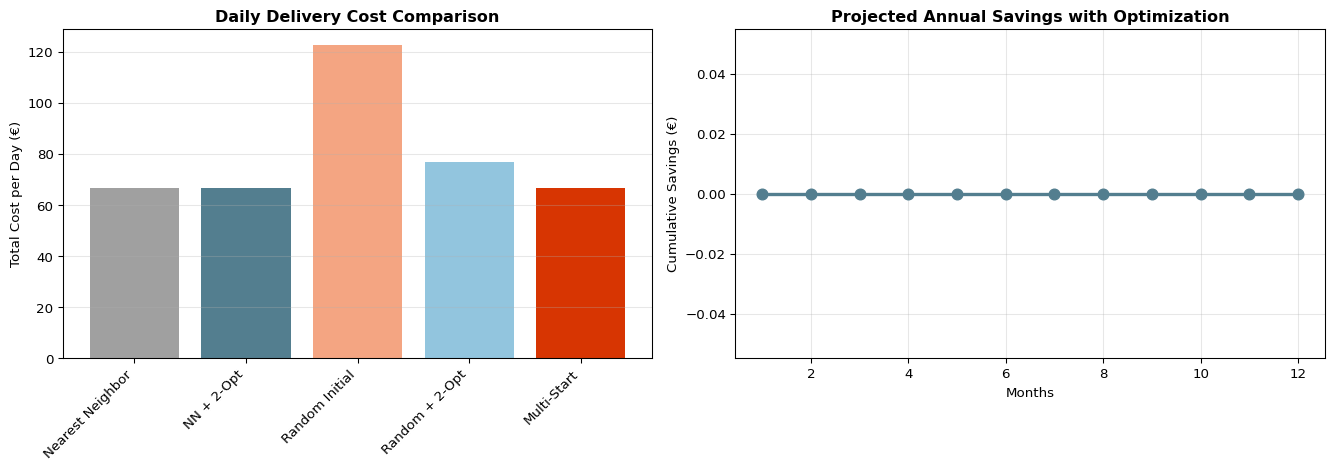

In [33]:
# Create final recommendation visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Cost comparison bar chart
methods = [m[0] for m in methods_data]
distances = [m[1] for m in methods_data]
costs = [d * 1.50 + (d/30) * 30 for d in distances]

ax1.bar(range(len(methods)), costs, color=['#A0A0A0', '#537E8F', '#F4A582', '#92C5DE', '#D73502'])
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.set_ylabel('Total Cost per Day (€)')
ax1.set_title('Daily Delivery Cost Comparison', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Improvement over time
baseline = costs[0]
savings = [baseline - c for c in costs]
months = range(1, 13)
cumulative_savings = [s * 20 * m for m in months for s in [savings[1]]]  # Using NN+2-opt

ax2.plot(months, cumulative_savings, 'o-', color='#537E8F', linewidth=2.5, markersize=8)
ax2.fill_between(months, 0, cumulative_savings, alpha=0.3, color='#537E8F')
ax2.set_xlabel('Months')
ax2.set_ylabel('Cumulative Savings (€)')
ax2.set_title('Projected Annual Savings with Optimization', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Conclusion

**Congratulations!** You’ve learned the fundamentals of route
optimization and local search!

## Key Takeaways

1.  **The Traveling Salesman Problem (TSP)**:
    -   Visiting all locations with minimum distance
    -   Exact solutions impractical for real-world problems
2.  **Greedy Construction Algorithms**:
    -   **Nearest Neighbor**: Fast, simple, decent quality
    -   Start somewhere, always go to closest unvisited location
    -   Quick to implement and understand
3.  **Local Search Improvement**:
    -   **2-opt**: Systematically uncross routes to reduce distance
    -   Converges to local optimum (best among nearby solutions)
    -   Simple yet powerful optimization technique
4.  **Multi-start Strategy**:
    -   Different starting points → different local optima
    -   Random starts help explore solution space
    -   Best found solution often much better than single attempt
5.  **Algorithm Performance**:
    -   **Nearest Neighbor**: Quick construction, reasonable results
    -   **NN + 2-Opt**: Balanced approach, more improvement possible
    -   Choice depends on time constraints and quality needs!
6.  **Business Impact**:
    -   Route optimization delivers immediate, measurable savings
    -   Better routes = lower fuel costs + faster deliveries
    -   Scales to much larger real-world delivery networks

## What’s Next?

You’ve now mastered the core concepts of routing optimization! In the
**Artisan Bakery Competition**, you’ll apply these techniques to a more
challenging problem with: - 16 cafés (vs. 10 franchises) - Time window
constraints (early deliveries required!)

In future lectures, you’ll learn advanced techniques like
**metaheuristics** (simulated annealing, genetic algorithms, tabu
search) that can escape local optima and find even better solutions by
intelligently exploring the solution space.

**Your Bean Counter deliveries are now optimized. Time to help the
bakery!**